In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class LakeModel:
    """
    解决湖泊模型并计算失业股票和率的动态。

    参数:
    ------------
    λ : 标量
        当前失业工人的找到工作率
    α : 标量
        当前雇用工人的解雇率
    b : 标量
        进入劳动力的速率
    d : 标量
        退出劳动力的速率

    """
    def __init__(self, λ=0.1, α=0.013, b=0.0124, d=0.00822):
        self.λ, self.α, self.b, self.d = λ, α, b, d

        λ, α, b, d = self.λ, self.α, self.b, self.d
        self.g = b - d
        g = self.g

        self.A = np.array([[(1-d)*(1-λ) + b,   α*(1-d) + b],
                           [        (1-d)*λ,   (1-α)*(1-d)]])


        self.ū = (1 + g - (1 - d) * (1 - α)) / (1 + g - (1 - d) * (1 - α) + (1 - d) * λ)
        self.ē = 1 - self.ū


    def simulate_path(self, x0, T=1000):
        """
        模拟雇用和失业的序列

        参数
        ----------
        x0 : 数组
            包含初始值 (u0,e0)
        T : 整数
            模拟期数

        返回值
        ----------
        x : 迭代器
            包含雇用和失业率的序列

        """
        x0 = np.atleast_1d(x0)  # 以防万一，将其重新转化为数组
        x_ts= np.zeros((2, T))
        x_ts[:, 0] = x0
        for t in range(1, T):
            x_ts[:, t] = self.A @ x_ts[:, t-1]
        return x_ts

/tmp/ipykernel_3433421/1349950017.py:25: UserWarning: Glyph 22833 (\N{CJK UNIFIED IDEOGRAPH-5931}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_3433421/1349950017.py:25: UserWarning: Glyph 19994 (\N{CJK UNIFIED IDEOGRAPH-4E1A}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_3433421/1349950017.py:25: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_3433421/1349950017.py:25: UserWarning: Glyph 23601 (\N{CJK UNIFIED IDEOGRAPH-5C31}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_3433421/1349950017.py:25: UserWarning: Glyph 21171 (\N{CJK UNIFIED IDEOGRAPH-52B3}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_3433421/1349950017.py:25: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_3433421/1349950017.py:25: UserWarning: Glyph 21147 (\N{CJK UNIFIED IDEOGRAPH-529B}) missing from curren

/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22833 (\N{CJK UNIFIED IDEOGRAPH-5931}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 19994 (\N{CJK UNIFIED IDEOGRAPH-4E1A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 23601 (\N{CJK UNIFIED IDEOGRAPH-5C31}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabt

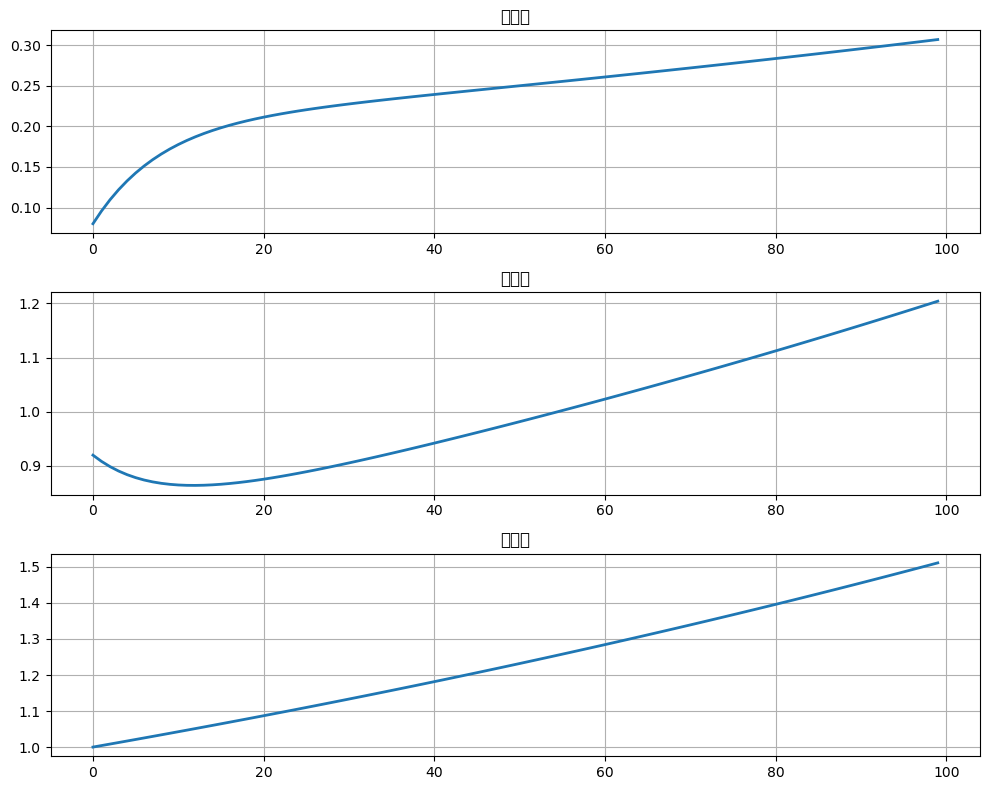

In [3]:
lm = LakeModel()
e_0 = 0.92          # 初始就业率
u_0 = 1 - e_0       # 初始失业率，给定初始 n_0 = 1

lm = LakeModel()
T = 100             # 模拟时长

x_0 = (u_0, e_0)
x_path = lm.simulate_path(x_0, T)

fig, axes = plt.subplots(3, 1, figsize=(10, 8))

axes[0].plot(x_path[0, :], lw=2)
axes[0].set_title('失业率')

axes[1].plot(x_path[1, :], lw=2)
axes[1].set_title('就业率')

axes[2].plot(x_path.sum(0), lw=2)
axes[2].set_title('劳动力')

for ax in axes:
    ax.grid()

plt.tight_layout()
plt.show()

Font 'default' does not have a glyph for '\u52b3' [U+52b3], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u52a8' [U+52a8], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u529b' [U+529b], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u52b3' [U+52b3], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u52a8' [U+52a8], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u529b' [U+529b], substituting with a dummy symbol.


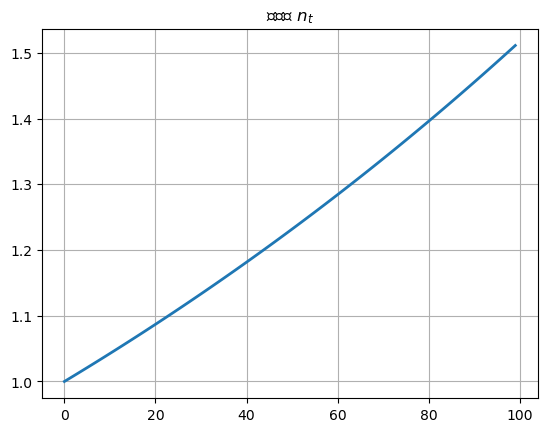

In [4]:
fig, ax = plt.subplots()

ax.plot(x_path.sum(0), lw=2)
ax.grid()
ax.set_title('劳动力 $n_t$')

plt.show()

In [5]:
def plot_time_paths(lm, x0=None, T=1000, ax=None):
        """
        绘制模拟的时间序列。

        参数
        ----------
        lm : class
            湖泊模型
        x0 : array
            包含一些不同的初始值。
        T : int
            模拟的时期数

        """

        if x0 is None:
            x0 = np.array([[5.0, 0.1]])

        ū, ē = lm.ū, lm.ē

        x0 = np.atleast_2d(x0)

        if ax is None:
            fig, ax = plt.subplots(figsize=(10, 8))
            # 绘制线 D
            s = 10
            ax.plot([0, s * ū], [0, s * ē], "k--", lw=1, label='set $D$')

        # 设置原点通过的轴
        for spine in ["left", "bottom"]:
            ax.spines[spine].set_position("zero")
        for spine in ["right", "top"]:
            ax.spines[spine].set_color("none")

        ax.set_xlim(-2, 6)
        ax.set_ylim(-2, 6)
        ax.set_xlabel("失业工人")
        ax.set_ylabel("就业工人")
        ax.set_xticks((0, 6))
        ax.set_yticks((0, 6))

        # 绘制时间序列
        for x in x0:
            x_ts = lm.simulate_path(x0=x)

            ax.scatter(x_ts[0, :], x_ts[1, :], s=4,)

            u0, e0 = x
            ax.plot([u0], [e0], "ko", ms=2, alpha=0.6)
            ax.annotate(f'$x_0 = ({u0},{e0})$',
                        xy=(u0, e0),
                        xycoords="data",
                        xytext=(0, 20),
                        textcoords="offset points",
                        arrowprops=dict(arrowstyle = "->"))

        ax.plot([ū], [ē], "ko", ms=4, alpha=0.6)
        ax.annotate(r'$\bar{x}$',
                xy=(ū, ē),
                xycoords="data",
                xytext=(20, -20),
                textcoords="offset points",
                arrowprops=dict(arrowstyle = "->"))

        if ax is None:
            plt.show()

/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 22833 (\N{CJK UNIFIED IDEOGRAPH-5931}) missing from current font.
  func(*args, **kwargs)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 19994 (\N{CJK UNIFIED IDEOGRAPH-4E1A}) missing from current font.
  func(*args, **kwargs)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 24037 (\N{CJK UNIFIED IDEOGRAPH-5DE5}) missing from current font.
  func(*args, **kwargs)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  func(*args, **kwargs)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 23601 (\N{CJK UNIFIED IDEOGRAPH-5C31}) missing from current font.

/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24037 (\N{CJK UNIFIED IDEOGRAPH-5DE5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


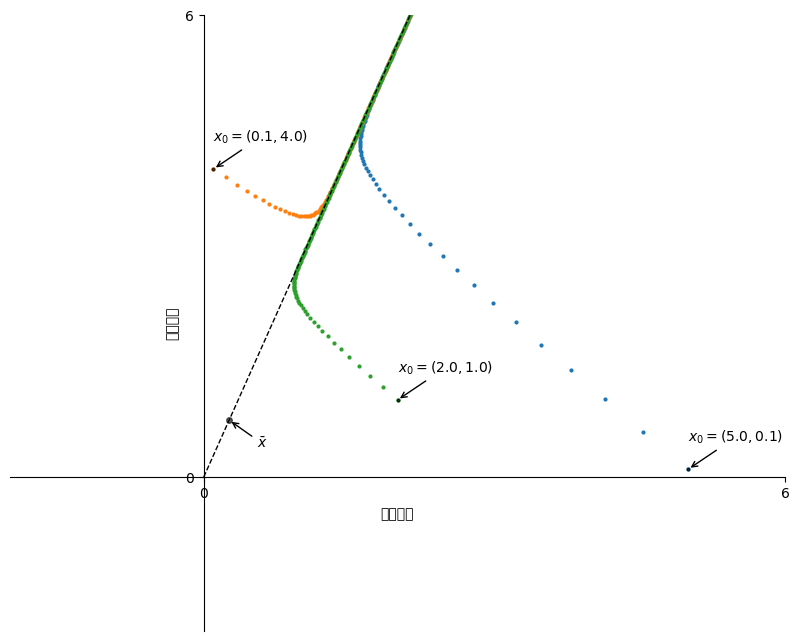

In [6]:
lm = LakeModel(α=0.01, λ=0.1, d=0.02, b=0.025)
x0 = ((5.0, 0.1), (0.1, 4.0), (2.0, 1.0))
plot_time_paths(lm, x0=x0)

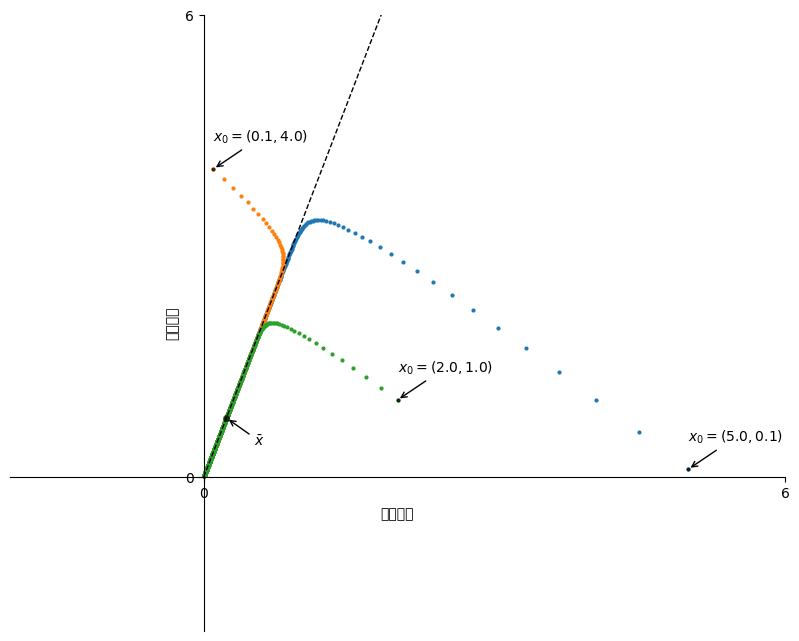

In [7]:
lm = LakeModel(α=0.01, λ=0.1, d=0.025, b=0.02)
plot_time_paths(lm, x0=x0)

/tmp/ipykernel_3433421/4065852808.py:31: UserWarning: Glyph 22833 (\N{CJK UNIFIED IDEOGRAPH-5931}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_3433421/4065852808.py:31: UserWarning: Glyph 19994 (\N{CJK UNIFIED IDEOGRAPH-4E1A}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_3433421/4065852808.py:31: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_3433421/4065852808.py:31: UserWarning: Glyph 23601 (\N{CJK UNIFIED IDEOGRAPH-5C31}) missing from current font.
  plt.tight_layout()


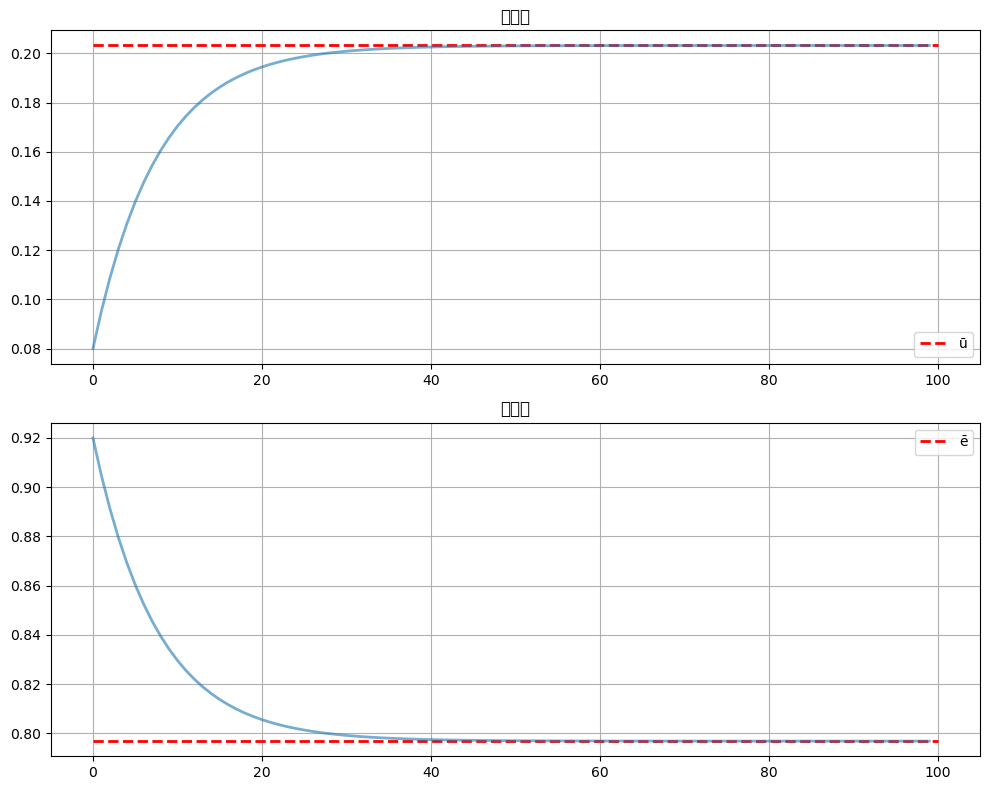

In [8]:
lm = LakeModel()
e_0 = 0.92          # 初始就业率
u_0 = 1 - e_0       # 初始失业率，给定初始 n_0 = 1

lm = LakeModel()
T = 100         # 模拟时长

x_0 = (u_0, e_0)

x_path = lm.simulate_path(x_0, T)

rate_path = x_path / x_path.sum(0)

fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# 绘制稳定的 ū 和 ē
axes[0].hlines(lm.ū, 0, T, 'r', '--', lw=2, label='ū')
axes[1].hlines(lm.ē, 0, T, 'r', '--', lw=2, label='ē')

titles = ['失业率', '就业率']
locations = ['lower right', 'upper right']

# 绘制失业率和就业率
for i, ax in enumerate(axes):
    ax.plot(rate_path[i, :], lw=2, alpha=0.6)
    ax.set_title(titles[i])
    ax.grid()
    ax.legend(loc=locations[i])


plt.tight_layout()
plt.show()

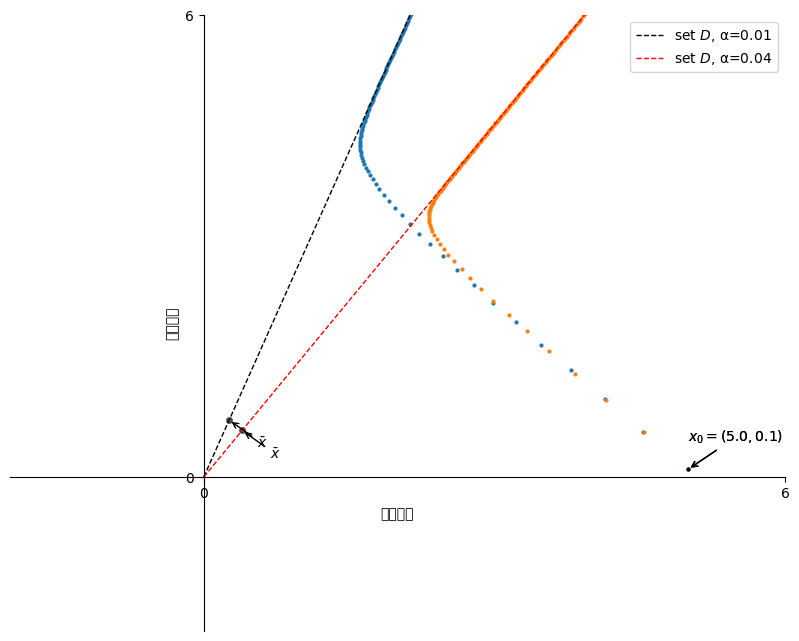

In [9]:
fig, ax = plt.subplots(figsize=(10, 8))

lm = LakeModel(α=0.01, λ=0.1, d=0.02, b=0.025)
plot_time_paths(lm, ax=ax)
s=10
ax.plot([0, s * lm.ū], [0, s * lm.ē], "k--", lw=1, label='set $D$, α=0.01')

lm = LakeModel(α=0.04, λ=0.1, d=0.02, b=0.025)
plot_time_paths(lm, ax=ax)
ax.plot([0, s * lm.ū], [0, s * lm.ē], "r--", lw=1, label='set $D$, α=0.04')

ax.legend(loc='best')
plt.show()